## Develop a ML method for classifying your income mail

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt

In [60]:
mail_db=pd.read_csv("C:/Users/Dell/spam_ham_dataset.csv")
mail_db.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [61]:
mail_db.isnull().value_counts()

Unnamed: 0  label  text   label_num
False       False  False  False        5171
dtype: int64

In [62]:
mail_db.drop("Unnamed: 0", axis=1,inplace=True)

In [63]:
mail_db.isnull()

,label,text,label_num
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5166,False,False,False
5167,False,False,False
5168,False,False,False
5169,False,False,False


In [64]:
mail_db.value_counts("label_num")

label_num
0    3672
1    1499
dtype: int64

In [65]:
mail_db.drop("label", axis=1, inplace=True)

In [66]:
mail_db

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [67]:
spam = mail_db[mail_db['label_num']==0]
spam

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
sh=vect.fit_transform(mail_db['text'])
print(sh.toarray())

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
ham = mail_db[mail_db['label_num']==1]
ham

,text,label_num
3,"Subject: photoshop , windows , office . cheap ...",1
7,Subject: looking for medication ? we ` re the ...,1
10,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,Subject: report 01405 !\r\nwffur attion brom e...,1
13,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
...,...,...
5159,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,Subject: penny stocks are about timing\r\nnoma...,1
5162,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,Subject: slutty milf wants to meet you\r\ntake...,1


In [70]:
mail_db.groupby('label_num').describe()

text                                                               
          count unique                                                top freq
label_num                                                                     
0          3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1          1499   1462                                      Subject: \r\n   16

In [71]:
mail_db['Length']=mail_db['text'].apply(len)
mail_db

,text,label_num,Length
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,Subject: industrial worksheets for august 2000...,0,573


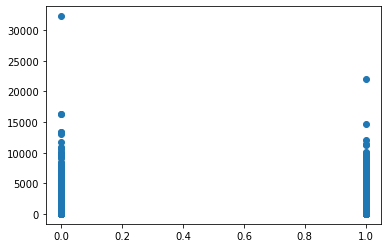

In [72]:
pyplt.scatter(mail_db.label_num, mail_db.Length)
pyplt.show()

In [73]:
from wordcloud import WordCloud, STOPWORDS

In [74]:
comment_word = ''
stopwords= set(STOPWORDS)

In [75]:
#Loop through the email dataset and go through the "text" column
for val in mail_db.text:
    val = str(val)
    tokens=  val.strip().split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_word += " ".join(tokens)+" "


In [76]:
wc = WordCloud(width=2000, height=1000, background_color='white', stopwords=stopwords, min_font_size=12).generate(comment_word)

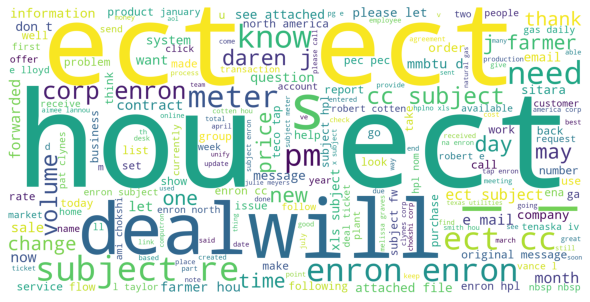

In [77]:
pyplt.figure(figsize=(8,8), facecolor=None)
pyplt.imshow(wc)
pyplt.axis("off")
pyplt.tight_layout(pad=0)
pyplt.show()

In [78]:
import re

def mailprocess(text):
    text= text.replace('\r',' ')
    text = text.replace('\n', ' ')
    text = text.replace('#', '')
    text = text.replace("Subject:","")
    text = text.replace("we 're", "we are")
    text = text.replace("ect","etc")
    text = text.replace("you 're","you are")
    return text
    

In [79]:
mail_db['clean_text']=mail_db['text'].map(mailprocess)
mail_db

,text,label_num,Length,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,enron methanol ; meter : 988291 this is a f...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"hpl nom for january 9 , 2001 ( see attached ..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"neon retreat ho ho ho , we ' re around to th..."
3,"Subject: photoshop , windows , office . cheap ...",1,414,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,336,re : indian springs this deal is to book the...
...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,put the 10 on the ft the transport volumes d...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,3 / 4 / 2000 and following noms hpl can ' t ...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,"calpine daily gas nomination > > julie , a..."
5169,Subject: industrial worksheets for august 2000...,0,573,industrial worksheets for august 2000 activit...


## converting clean_text column to vector

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
count= count_vect.fit_transform(mail_db['clean_text'])
print(count.shape)

(5171, 50446)


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x=count
y=mail_db['label_num'].values
print(y)

[0 0 0 ... 0 0 1]


In [83]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [85]:
gNB = GaussianNB()

In [86]:
y_pred=gNB.fit(x_train.toarray(), y_train).predict(x_test.toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       732
           1       0.97      0.90      0.94       303

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [87]:
cm=confusion_matrix(y_test, y_pred)
cm


array([[723,   9],
       [ 29, 274]], dtype=int64)

In [88]:
accuracy_score(y_test, y_pred)

0.9632850241545894

In [91]:
comment_word1 = ''
stopwords1 = set(STOPWORDS)

In [92]:
#Loop through the email dataset and go through the "text" column
for val in mail_db.clean_text:
    val = str(val)
    tokens=  val.strip().split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_word1 += " ".join(tokens)+" "

In [94]:
wc1 = WordCloud(width=2000, height=1000, background_color='white', stopwords=stopwords, min_font_size=12).generate(comment_word1)

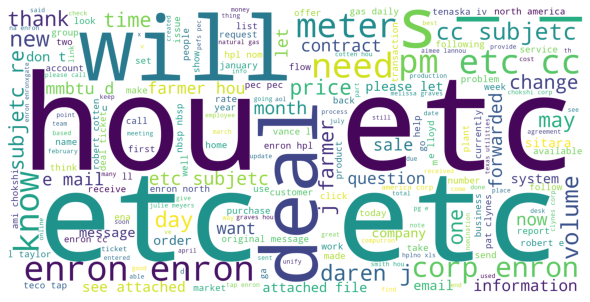

In [95]:
pyplt.figure(figsize=(8,8), facecolor=None)
pyplt.imshow(wc1)
pyplt.axis("off")
pyplt.tight_layout(pad=0)
pyplt.show()